In [1]:
import pandas as pd

import numpy as np

# Read in excel file of 2016 data
file = '/Users/Laurasaur/Desktop/Springboard/Datasets/2016/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2016.xls'

xl = pd.ExcelFile(file)

# We want the first and only sheet
df2 = xl.parse(0)

# remove the first 4 rows, which contain the title
df2_sliced = df2.loc[5:]

# rename the cols
df2_sliced.columns = ['State', 'Agency_Type', 'Agency_Name', 'Race', 'Religion', 'Sexual_Orientation', 'Disability', 'Gender', 'Gender_ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Pop']

# copy df, and then forward fill the state and agency type cols
df2_filled = df2_sliced

df2_filled[['State', 'Agency_Type']] = df2_filled[['State', 'Agency_Type']].ffill()

# copy and replace the NAs in df2_totals Agency Name col with the word total, because the NAs are only in cols w/ total
df2_totals = df2_filled

df2_totals = df2_totals.fillna(value={'Agency_Name' : 'Total'})
   
# reset index, so it starts at 1 not 5 
df2_indexed = df2_totals.reset_index()

print(df2_indexed.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      5  Alabama       Total       Total   12        1                  1   
1      6  Alabama      Cities       Total   12        1                  1   
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   

  Disability Gender Gender_ID   Q1   Q2   Q3   Q4     Pop  
0          0      0         0  NaN  NaN  NaN  NaN     NaN  
1          0      0         0  NaN  NaN  NaN  NaN     NaN  
2          0      0         0    3    2    2    2  212549  
3          0      0         0    0    0    1    0   40160  
4          0      0         0    0    1    0    0   17639  


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [2]:
#### I noticed some of the agency names contained numbers left over from subscript on the original data. I want to remove those.

df2_indexed['Agency_Name'] = df2_indexed.Agency_Name.str.replace('2', '')

df2_indexed['Agency_Name'] = df2_indexed.Agency_Name.str.replace('1', '')

df2_indexed.head()

,index,State,Agency_Type,Agency_Name,Race,Religion,Sexual_Orientation,Disability,Gender,Gender_ID,Q1,Q2,Q3,Q4,Pop
0,5,Alabama,Total,Total,12,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN
1,6,Alabama,Cities,Total,12,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN
2,7,Alabama,Cities,Birmingham,7,1,1,0,0,0,3,2,2,2,212549
3,8,Alabama,Cities,Florence,1,0,0,0,0,0,0,0,1,0,40160
4,9,Alabama,Cities,Foley,1,0,0,0,0,0,0,1,0,0,17639


In [4]:
## We're going to get the state abbreviations in order to match some of the datasets later
## we then make a dictionary, with the state names as keys and the abbreviations as values

state_file = '/Users/Laurasaur/Desktop/Springboard/Datasets/states.csv'

states = pd.read_csv(state_file)

states_dict = pd.Series(states.Abbreviation.values, index=states.State).to_dict()

print(states_dict)

{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}


In [6]:
## Now we create a new col in the dataset, containing the state abbreviations:

df2_abb= df2_indexed.copy()

df2_abb['Abbreviation'] = df2_abb['State'].map(states_dict)

print(df2_abb.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      5  Alabama       Total       Total   12        1                  1   
1      6  Alabama      Cities       Total   12        1                  1   
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   

  Disability Gender Gender_ID   Q1   Q2   Q3   Q4     Pop Abbreviation  
0          0      0         0  NaN  NaN  NaN  NaN     NaN           AL  
1          0      0         0  NaN  NaN  NaN  NaN     NaN           AL  
2          0      0         0    3    2    2    2  212549           AL  
3          0      0         0    0    0    1    0   40160           AL  
4          0      0         0    0    1    0    0   17639           AL  


In [7]:
## Next, we create another col that contains a string of the city name and the state abbreviation

df2_abb['City_State'] = df2_abb['Agency_Name'] + ", "  + df2_abb['Abbreviation']

print(df2_abb.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      5  Alabama       Total       Total   12        1                  1   
1      6  Alabama      Cities       Total   12        1                  1   
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   

  Disability Gender Gender_ID   Q1   Q2   Q3   Q4     Pop Abbreviation  \
0          0      0         0  NaN  NaN  NaN  NaN     NaN           AL   
1          0      0         0  NaN  NaN  NaN  NaN     NaN           AL   
2          0      0         0    3    2    2    2  212549           AL   
3          0      0         0    0    0    1    0   40160           AL   
4          0      0         0    0    1    0    0   17639           AL   

       City_State  
0       Total, AL  
1       Total, AL  
2  Birmingham, AL  
3    F

In [8]:
#### Now we get rid of every entry that's not a city (b/c we only want to examine cities)
### And we get rid of all the total agencies, as we won't use that information for out analysis

df2_cities = df2_abb[df2_abb.Agency_Type == 'Cities']

df2_cities = df2_cities[df2_cities.Agency_Name != 'Total']

df2_cities.head()

,index,State,Agency_Type,Agency_Name,Race,Religion,Sexual_Orientation,Disability,Gender,Gender_ID,Q1,Q2,Q3,Q4,Pop,Abbreviation,City_State
2,7,Alabama,Cities,Birmingham,7,1,1,0,0,0,3,2,2,2,212549,AL,"Birmingham, AL"
3,8,Alabama,Cities,Florence,1,0,0,0,0,0,0,0,1,0,40160,AL,"Florence, AL"
4,9,Alabama,Cities,Foley,1,0,0,0,0,0,0,1,0,0,17639,AL,"Foley, AL"
5,10,Alabama,Cities,Hoover,3,0,0,0,0,0,1,0,1,1,85601,AL,"Hoover, AL"
8,13,Alaska,Cities,Anchorage,4,0,0,0,0,0,1,0,2,1,299097,AK,"Anchorage, AK"


In [10]:
# Now we want to see how many datapoints were removed by taking out the cities and totals

len(df2_abb) - len(df2_cities)

754

In [11]:
##### Now we read in the dataset with the information about the counties, which we will use to match the
##### Hate Crime dataset with the dataset containing political and demographic information

county_file = '/Users/Laurasaur/Desktop/Springboard/Datasets/uscitiesv1.4.csv'

counties = pd.read_csv(county_file)

counties.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659


In [12]:
## Now I'll make a col containing the state, city, and county, and remove all duplicates
## so that we have only unique sets (b/c there are duplicates in dataset because it also includes unique log and lat)

counties['City_County'] = counties.state_id + ", " + counties.city + ", " + counties.county_name

counties.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,City_County
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882,"WA, Prairie Ridge, Pierce"
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314,"WA, Edison, Skagit"
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265,"WA, Packwood, Lewis"
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725,"WA, Wautauga Beach, Kitsap"
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659,"WA, Harper, Kitsap"


In [13]:
### Now we create the seperate city, state, and county cols, and get rid of all the other info we don't need

counties3 = counties['City_County'].str.split(pat=', ', expand = True)

counties3.columns = ['State', 'City', 'County']

counties3['City_State'] = counties3.City + ", " + counties3.State

counties3.head()

,State,City,County,City_State
0,WA,Prairie Ridge,Pierce,"Prairie Ridge, WA"
1,WA,Edison,Skagit,"Edison, WA"
2,WA,Packwood,Lewis,"Packwood, WA"
3,WA,Wautauga Beach,Kitsap,"Wautauga Beach, WA"
4,WA,Harper,Kitsap,"Harper, WA"


In [14]:
#### Now we're going to make a dictionary, to match the city_state col with the county col

counties_dict1 = pd.Series(counties3.County.values, index=counties3.City_State).to_dict()

#print(counties_dict1)

{'Prairie Ridge, WA': 'Pierce', 'Edison, WA': 'Skagit', 'Packwood, WA': 'Lewis', 'Wautauga Beach, WA': 'Kitsap', 'Harper, WA': 'Kitsap', 'Telma, WA': 'Chelan', 'Kahlotus, WA': 'Franklin', 'Mondovi, WA': 'Lincoln', 'Washtucna, WA': 'Adams', 'Pleasant Hill, WA': 'King', 'Toledo, WA': 'Lewis', 'Wabash, WA': 'King', 'Renton, WA': 'King', 'Chehalis, WA': 'Lewis', 'Central Valley, WA': 'Kitsap', 'Lake City, WA': 'Pierce', 'Megler, WA': 'Pacific', 'Alder, WA': 'Pierce', 'Ronald, WA': 'Kittitas', 'Belvedere, WA': 'Okanogan', 'Waverly, WA': 'Spokane', 'Turner Corner, WA': 'Snohomish', 'Lofall, WA': 'Kitsap', 'Kennydale, WA': 'King', 'Easton, WA': 'Kittitas', 'Navy Yard City, WA': 'Kitsap', 'Mercer Island, WA': 'King', 'Lynnwood, WA': 'Snohomish', 'Coulee City, WA': 'Grant', 'Douglas, WA': 'Douglas', 'Centralia, WA': 'Lewis', 'Colbert, WA': 'Spokane', 'Bryn Mawr, WA': 'King', 'Silverdale, WA': 'Kitsap', 'Lyle, WA': 'Klickitat', 'Malott, WA': 'Okanogan', 'Mountlake Terrace, WA': 'Snohomish', 'Ilw

In [15]:
#### So now we have a dataset with all the cities and counties, which should help us determine the county for each city in our original dataframe

df2_counties = df2_cities.copy()

df2_counties['County'] = df2_counties['City_State'].map(counties_dict1)

print(df2_counties.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   
5     10  Alabama      Cities      Hoover    3        0                  0   
8     13   Alaska      Cities   Anchorage    4        0                  0   

  Disability Gender Gender_ID Q1 Q2 Q3 Q4     Pop Abbreviation  \
2          0      0         0  3  2  2  2  212549           AL   
3          0      0         0  0  0  1  0   40160           AL   
4          0      0         0  0  1  0  0   17639           AL   
5          0      0         0  1  0  1  1   85601           AL   
8          0      0         0  1  0  2  1  299097           AK   

       City_State      County  
2  Birmingham, AL   Jefferson  
3    Florence, AL  Lauderdale  
4       Foley, AL     Baldwin  
5     

In [18]:
### Now we want to know how many matches we can find, and thus how much information we can match

len(df2_counties)

1265

In [19]:
df2_counties['County'].isnull().sum()

196

In [20]:
(1265 - 196)/1265 # so we have the county info for about 85% of the cities, or 1069

0.8450592885375494

In [21]:
############ Now we read in the datasets that contain the election results
# clean that, rehape so each candidate is a col, and organize it by county

prez_file = '/Users/Laurasaur/Desktop/Springboard/Datasets/pres16results.csv'

prez_df = pd.read_csv(prez_file)

print(prez_df.head())

  county fips             cand  st  pct_report       votes  total_votes  \
0    NaN   US     Donald Trump  US      0.9951  60350241.0  127592176.0   
1    NaN   US  Hillary Clinton  US      0.9951  60981118.0  127592176.0   
2    NaN   US     Gary Johnson  US      0.9951   4164589.0  127592176.0   
3    NaN   US       Jill Stein  US      0.9951   1255968.0  127592176.0   
4    NaN   US    Evan McMullin  US      0.9951    451636.0  127592176.0   

        pct          lead  
0  0.472993  Donald Trump  
1  0.477938  Donald Trump  
2  0.032640  Donald Trump  
3  0.009844  Donald Trump  
4  0.003540  Donald Trump  


In [22]:
# removing the cols we're not going to use, and dropping ann NAs (because they indicate a total count, not per county)

prez_df1 = prez_df[['county', 'cand', 'st', 'pct']]

prez_df2 = prez_df1.dropna()

print(prez_df2.head())

                 county             cand  st       pct
159  Los Angeles County  Hillary Clinton  CA  0.714965
160  Los Angeles County     Donald Trump  CA  0.234454
161  Los Angeles County     Gary Johnson  CA  0.024589
162  Los Angeles County       Jill Stein  CA  0.020171
163  Los Angeles County   Gloria La Riva  CA  0.005821


In [23]:
### Now we remove the word county from the counties, so they can be matched

prez_df2['county'] = prez_df2.county.str.replace(' County', '')

print(prez_df2.head())

          county             cand  st       pct
159  Los Angeles  Hillary Clinton  CA  0.714965
160  Los Angeles     Donald Trump  CA  0.234454
161  Los Angeles     Gary Johnson  CA  0.024589
162  Los Angeles       Jill Stein  CA  0.020171
163  Los Angeles   Gloria La Riva  CA  0.005821


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
### Now we create a county state col

prez_df2['County_State'] = prez_df2.county + ", " + prez_df2.st

print(prez_df2.head())

          county             cand  st       pct     County_State
159  Los Angeles  Hillary Clinton  CA  0.714965  Los Angeles, CA
160  Los Angeles     Donald Trump  CA  0.234454  Los Angeles, CA
161  Los Angeles     Gary Johnson  CA  0.024589  Los Angeles, CA
162  Los Angeles       Jill Stein  CA  0.020171  Los Angeles, CA
163  Los Angeles   Gloria La Riva  CA  0.005821  Los Angeles, CA


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
### now we reshape the data so that each candidate is a col

prez_reshape = prez_df2.pivot(index = 'County_State', columns = 'cand', values = 'pct')

print(prez_reshape.head())

cand                None of these candidates  Alyson Kennedy  Bradford Lyttle  \
County_State                                                                    
Abbeville, SC                            NaN             NaN              NaN   
Acadia Parish, LA                        NaN        0.000292              NaN   
Accomack, VA                             NaN             NaN              NaN   
Ada, ID                                  NaN             NaN              NaN   
Adair, IA                                NaN             NaN              NaN   

cand               Chris Keniston  Dan Vacek  Darrell Castle  Donald Trump  \
County_State                                                                 
Abbeville, SC                 NaN        NaN        0.003543      0.628683   
Acadia Parish, LA        0.001022        NaN        0.001826      0.772621   
Accomack, VA                  NaN        NaN             NaN      0.544716   
Ada, ID                       NaN        N

In [26]:
# Next we check the names of the cols, to see how to proceed

print(prez_reshape.columns)

Index([' None of these candidates', 'Alyson Kennedy', 'Bradford Lyttle',
       'Chris Keniston', 'Dan Vacek', 'Darrell Castle', 'Donald Trump',
       'Emidio Soltysik', 'Evan McMullin', 'Frank Atwood', 'Gary Johnson',
       'Gloria La Riva', 'Hillary Clinton', 'Jerry White', 'Jill Stein',
       'Jim Hedges', 'Joseph Maldonado', 'Kyle Kopitke', 'Laurence Kotlikoff',
       'Lynn Kahn', 'Michael Maturen', 'Mike Smith', 'Monica Moorehead',
       'Peter Skewes', 'Princess Jacob', 'Richard Duncan',
       'Rocky De La Fuente', 'Rocky Giordani', 'Rod Silva', 'Ryan Scott',
       'Scott Copeland', 'Tom Hoefling'],
      dtype='object', name='cand')


In [27]:
## Now we're going to reorder some of the cols

prez_reshape = prez_reshape[['Donald Trump', 'Hillary Clinton', ' None of these candidates', 'Alyson Kennedy', 'Bradford Lyttle',
       'Chris Keniston', 'Dan Vacek', 'Darrell Castle',
       'Emidio Soltysik', 'Evan McMullin', 'Frank Atwood', 'Gary Johnson',
       'Gloria La Riva', 'Jerry White', 'Jill Stein',
       'Jim Hedges', 'Joseph Maldonado', 'Kyle Kopitke', 'Laurence Kotlikoff',
       'Lynn Kahn', 'Michael Maturen', 'Mike Smith', 'Monica Moorehead',
       'Peter Skewes', 'Princess Jacob', 'Richard Duncan',
       'Rocky De La Fuente', 'Rocky Giordani', 'Rod Silva', 'Ryan Scott',
       'Scott Copeland', 'Tom Hoefling']]

print(prez_reshape.head())

cand               Donald Trump  Hillary Clinton   None of these candidates  \
County_State                                                                  
Abbeville, SC          0.628683         0.346140                        NaN   
Acadia Parish, LA      0.772621         0.205872                        NaN   
Accomack, VA           0.544716         0.427610                        NaN   
Ada, ID                0.479316         0.386917                        NaN   
Adair, IA              0.653365         0.299814                        NaN   

cand               Alyson Kennedy  Bradford Lyttle  Chris Keniston  Dan Vacek  \
County_State                                                                    
Abbeville, SC                 NaN              NaN             NaN        NaN   
Acadia Parish, LA        0.000292              NaN        0.001022        NaN   
Accomack, VA                  NaN              NaN             NaN        NaN   
Ada, ID                       NaN        

In [29]:
## Now we're going to create another dataset that doesn't contain Trump or Clinton, so we can then use a summation and
## create another col, Independent, for the independents

col_list = list(prez_reshape)

col_list.remove('Donald Trump')
col_list.remove('Hillary Clinton')

prez_reshape['Independent'] = prez_reshape[col_list].sum(axis=1)

pres_reshaped_final = prez_reshape[['Donald Trump', 'Hillary Clinton', 'Independent']]

print(pres_reshaped_final.head())

cand               Donald Trump  Hillary Clinton  Independent
County_State                                                 
Abbeville, SC          0.628683         0.346140     0.050354
Acadia Parish, LA      0.772621         0.205872     0.043015
Accomack, VA           0.544716         0.427610     0.055348
Ada, ID                0.479316         0.386917     0.267533
Adair, IA              0.653365         0.299814     0.093642


In [30]:
#### Now we're gonna merge the political information with the hate crime dataset

# here, we create the county state variable to merge on, since each county name might be repeated across states
df2_counties['County_State'] = df2_counties.County + ", " + df2_counties.Abbreviation

df2_counties.head()

,index,State,Agency_Type,Agency_Name,Race,Religion,Sexual_Orientation,Disability,Gender,Gender_ID,Q1,Q2,Q3,Q4,Pop,Abbreviation,City_State,County,County_State
2,7,Alabama,Cities,Birmingham,7,1,1,0,0,0,3,2,2,2,212549,AL,"Birmingham, AL",Jefferson,"Jefferson, AL"
3,8,Alabama,Cities,Florence,1,0,0,0,0,0,0,0,1,0,40160,AL,"Florence, AL",Lauderdale,"Lauderdale, AL"
4,9,Alabama,Cities,Foley,1,0,0,0,0,0,0,1,0,0,17639,AL,"Foley, AL",Baldwin,"Baldwin, AL"
5,10,Alabama,Cities,Hoover,3,0,0,0,0,0,1,0,1,1,85601,AL,"Hoover, AL",Jefferson,"Jefferson, AL"
8,13,Alaska,Cities,Anchorage,4,0,0,0,0,0,1,0,2,1,299097,AK,"Anchorage, AK",Anchorage,"Anchorage, AK"


In [31]:
### Now we do the merge, using the ID and the County_State cols, and we use a left merge because we're only interested in info from the hate crimes dataset
merge1 = pd.merge(df2_counties, pres_reshaped_final, right_index = True, left_on = 'County_State', how='left')

print(merge1.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   
5     10  Alabama      Cities      Hoover    3        0                  0   
8     13   Alaska      Cities   Anchorage    4        0                  0   

  Disability Gender Gender_ID     ...      Q3 Q4     Pop Abbreviation  \
2          0      0         0     ...       2  2  212549           AL   
3          0      0         0     ...       1  0   40160           AL   
4          0      0         0     ...       0  0   17639           AL   
5          0      0         0     ...       1  1   85601           AL   
8          0      0         0     ...       2  1  299097           AK   

       City_State      County    County_State Donald Trump Hillary Clinton  \
2  Birmingham,

In [ ]:
### now we look at the missing datapoints

merge1['Donald Trump'].isnull().sum() 


We don't have political information for aprox 218 counties, BUT 196 of the cities don't have county info, so that makes sense

In [33]:
############### Next, we import and clean the dataset with the demographic informaton about each political county

facts_file = '/Users/Laurasaur/Desktop/Springboard/Datasets/2016-us-election/county_facts.csv'

facts_df = pd.read_csv(facts_file)

### Removes the word county from the area name, so it can be matched with state

facts_df['area_name'] = facts_df.area_name.str.replace(' County', '')

print(facts_df.head())

   fips      area_name state_abbreviation  PST045214  PST040210  PST120214  \
0     0  United States                NaN  318857056  308758105        3.3   
1  1000        Alabama                NaN    4849377    4780127        1.4   
2  1001        Autauga                 AL      55395      54571        1.5   
3  1003        Baldwin                 AL     200111     182265        9.8   
4  1005        Barbour                 AL      26887      27457       -2.1   

   POP010210  AGE135214  AGE295214  AGE775214    ...      SBO415207  \
0  308745538        6.2       23.1       14.5    ...            8.3   
1    4779736        6.1       22.8       15.3    ...            1.2   
2      54571        6.0       25.2       13.8    ...            0.7   
3     182265        5.6       22.2       18.7    ...            1.3   
4      27457        5.7       21.2       16.5    ...            0.0   

   SBO015207   MAN450207   WTN220207   RTN130207  RTN131207  AFN120207  \
0       28.8  5319456312  4174

In [34]:
### we're gonna rename the cols to make them more readable, and to pick which we want to use


col_names_facts = ['fips', 'area_name', 'state_abbreviation', 'pop2014', 'pop2010base', 'pop_change', 'pop2010', 'under5', 'under18', 'over65', 'female_pct', 'white_pct', 'black_pct', 
                   'native_american_pct', 'asian_pct', 'pacific_pct', 'biracial_pct', 'hispanic_pct', 'white_not_hispanic', 'same_house_pct', 'foreign_born_pct', 'non-english_home_pct', 'hs_higher_pct',
                   'college_pct', 'vetrans', 'time_to_work', 'housing_units', 'homeownership', 'housing_multiunits', 'housing_value', 'households', 'persons_per_household', 
                   'per_cap_income', 'median_household_income', 'below_pov_pct', 'nonfarms', 'nonfarm_employment', 'nonfarm_pct_change', 'nonemployments', 'num_firms', 
                   'black_owned_firms', 'native_firms', 'asian_firms', 'pacific_firms', 'hispanic_firms', 'women_firms', 'shipments', 'sales', 'retail_sales', 'retail_sales_per_cap',
                   'acc_food_sales', 'building_permits', 'land_area', 'pop_per_sq_mile']

facts_df.columns = col_names_facts

print(facts_df.head())

   fips      area_name state_abbreviation    pop2014  pop2010base  pop_change  \
0     0  United States                NaN  318857056    308758105         3.3   
1  1000        Alabama                NaN    4849377      4780127         1.4   
2  1001        Autauga                 AL      55395        54571         1.5   
3  1003        Baldwin                 AL     200111       182265         9.8   
4  1005        Barbour                 AL      26887        27457        -2.1   

     pop2010  under5  under18  over65       ...         hispanic_firms  \
0  308745538     6.2     23.1    14.5       ...                    8.3   
1    4779736     6.1     22.8    15.3       ...                    1.2   
2      54571     6.0     25.2    13.8       ...                    0.7   
3     182265     5.6     22.2    18.7       ...                    1.3   
4      27457     5.7     21.2    16.5       ...                    0.0   

   women_firms   shipments       sales  retail_sales  retail_sales_p

In [35]:
### dropping nas and adding county state

facts_df2 = facts_df.dropna()

facts_df2['County_State'] = facts_df2.area_name + ", " + facts_df2.state_abbreviation

print(facts_df2.head())

   fips area_name state_abbreviation  pop2014  pop2010base  pop_change  \
2  1001   Autauga                 AL    55395        54571         1.5   
3  1003   Baldwin                 AL   200111       182265         9.8   
4  1005   Barbour                 AL    26887        27457        -2.1   
5  1007      Bibb                 AL    22506        22919        -1.8   
6  1009    Blount                 AL    57719        57322         0.7   

   pop2010  under5  under18  over65      ...       women_firms  shipments  \
2    54571     6.0     25.2    13.8      ...              31.7          0   
3   182265     5.6     22.2    18.7      ...              27.3    1410273   
4    27457     5.7     21.2    16.5      ...              27.0          0   
5    22915     5.3     21.0    14.8      ...               0.0          0   
6    57322     6.1     23.6    17.0      ...              23.2     341544   

   sales  retail_sales  retail_sales_per_cap  acc_food_sales  \
2      0        598175      

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [36]:
##### Now we connect the political information, hate crime information, and demographic information to create the final dataset

merge2 = pd.merge(merge1, facts_df2, right_on = 'County_State', left_on = 'County_State', how='left')

print(merge2.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      7  Alabama      Cities  Birmingham    7        1                  1   
1      8  Alabama      Cities    Florence    1        0                  0   
2      9  Alabama      Cities       Foley    1        0                  0   
3     10  Alabama      Cities      Hoover    3        0                  0   
4     13   Alaska      Cities   Anchorage    4        0                  0   

  Disability Gender Gender_ID       ...        hispanic_firms women_firms  \
0          0      0         0       ...                   1.3        29.8   
1          0      0         0       ...                   0.0        27.6   
2          0      0         0       ...                   1.3        27.3   
3          0      0         0       ...                   1.3        29.8   
4          0      0         0       ...                   NaN         NaN   

    shipments       sales retail_sales retail_sales_per_cap acc_food

In [37]:
### Last, we check how many of the datapoints in the combined dataset are null. I picked the col randomly
## we found 218 null values, the same as before, meaning that all the info for the datapoints that have county info
## could be accounted for in the new dataset

merge2['female_pct'].isnull().sum() 

218

In [38]:
# Lastly, I want to create a col that records the total number of hate crimes acorss quarters

merge2['Total_Hate_Crimes'] = merge2.Q1 + merge2.Q2 + merge2.Q3 + merge2.Q4

print(merge2.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      7  Alabama      Cities  Birmingham    7        1                  1   
1      8  Alabama      Cities    Florence    1        0                  0   
2      9  Alabama      Cities       Foley    1        0                  0   
3     10  Alabama      Cities      Hoover    3        0                  0   
4     13   Alaska      Cities   Anchorage    4        0                  0   

  Disability Gender Gender_ID        ...         women_firms   shipments  \
0          0      0         0        ...                29.8  10260950.0   
1          0      0         0        ...                27.6   1083658.0   
2          0      0         0        ...                27.3   1410273.0   
3          0      0         0        ...                29.8  10260950.0   
4          0      0         0        ...                 NaN         NaN   

        sales retail_sales retail_sales_per_cap acc_food_sales  \
0  13756

In [39]:
## First we're going to examine the cols, to see what we're working with and get some ideas for visualizations
## (and also import some packages we might need)
import matplotlib.pyplot as plt

import seaborn as sns

merge2.columns

Index(['index', 'State', 'Agency_Type', 'Agency_Name', 'Race', 'Religion',
       'Sexual_Orientation', 'Disability', 'Gender', 'Gender_ID', 'Q1', 'Q2',
       'Q3', 'Q4', 'Pop', 'Abbreviation', 'City_State', 'County',
       'County_State', 'Donald Trump', 'Hillary Clinton', 'Independent',
       'fips', 'area_name', 'state_abbreviation', 'pop2014', 'pop2010base',
       'pop_change', 'pop2010', 'under5', 'under18', 'over65', 'female_pct',
       'white_pct', 'black_pct', 'native_american_pct', 'asian_pct',
       'pacific_pct', 'biracial_pct', 'hispanic_pct', 'white_not_hispanic',
       'same_house_pct', 'foreign_born_pct', 'non-english_home_pct',
       'hs_higher_pct', 'college_pct', 'vetrans', 'time_to_work',
       'housing_units', 'homeownership', 'housing_multiunits', 'housing_value',
       'households', 'persons_per_household', 'per_cap_income',
       'median_household_income', 'below_pov_pct', 'nonfarms',
       'nonfarm_employment', 'nonfarm_pct_change', 'nonemployments',

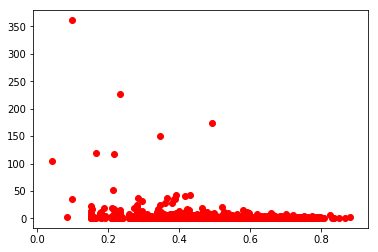

In [43]:
## First, we want to look at the relationship between total hate crimes and pct Trump votes

plt.scatter(x=merge2['Donald Trump'], y=merge2['Total_Hate_Crimes'], color = 'red')

(0, 50)

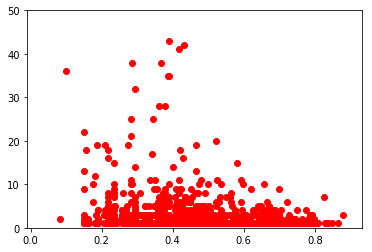

In [41]:
# let's re-adjust the x axis, to make the scatterplot clearer

plt.scatter(x=merge2['Donald Trump'], y=merge2['Total_Hate_Crimes'], color = 'red')

plt.ylim(0, 50)

It looks like the total number of hate crimes is highest in areas with 20-40% republican voters

(0, 50)

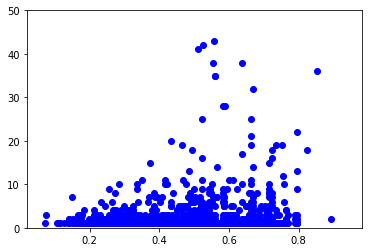

In [44]:
## Now for Hillary

plt.scatter(x=merge2['Hillary Clinton'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

(0, 50)

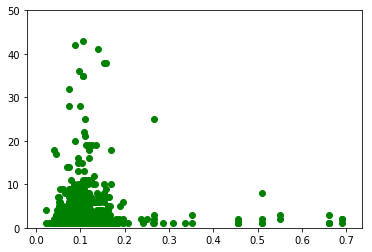

In [45]:
# Independents

plt.scatter(x=merge2['Independent'], y=merge2['Total_Hate_Crimes'], color = 'green')

plt.ylim(0, 50)

(0, 50)

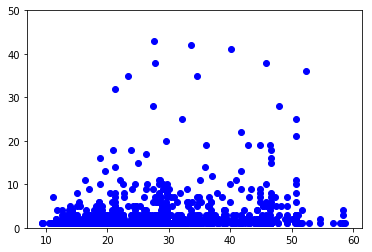

In [46]:
## Now we're going to look at education:

plt.scatter(x=merge2['college_pct'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

There doesn't appear to be a clear connection between the total number of hate crimes per county and the percent of the county that is college educated (although we did only examine cities)

(0, 50)

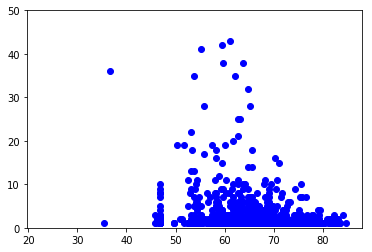

In [47]:
## Now we're going to look at home ownership:

plt.scatter(x=merge2['homeownership'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

Here, it does appear that counties with a lower pct of homeowners tend to also have more total hate crimes, although again because of the amount of clustering around 0, this trend may not be statistically significant

(0, 50)

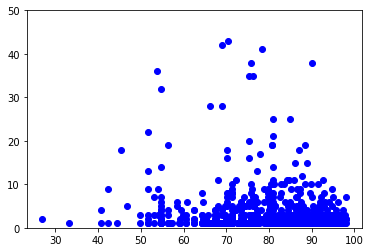

In [48]:
## Percent White:

plt.scatter(x=merge2['white_pct'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

Surprisingly, there does not appear to be an apparent relationship between the percent white a county is and the total number of hate crimes

(0, 50)

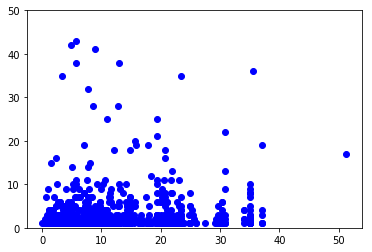

In [49]:
## Foreign Born

plt.scatter(x=merge2['foreign_born_pct'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

Likewise, there does not appear to be a clear relationship between the pct of the population that is foreign born and the number of hate crimes

(0, 50)

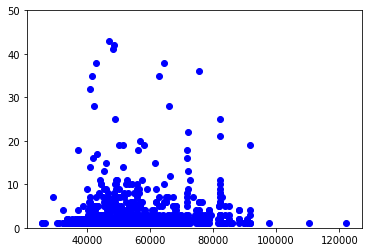

In [50]:
## Median Household Income

plt.scatter(x=merge2['median_household_income'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

There may be a weak relationship between the median household income and the total hate crimes per county. The wealthiest outliers seem to have a very low number of hate crimes, while the scatterplot peaks at around 50k

(0, 20)

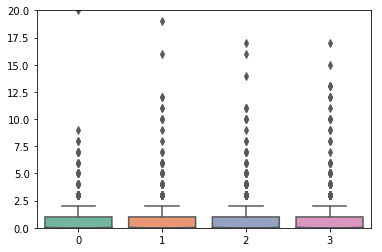

In [51]:
## Next, we're going to compare the number of hate crimes per quarter:

Qs = merge2.iloc[:, 10:14] #selecting the Q1-Q4 cols

QArray = np.array(Qs)

QArray1 = np.nan_to_num(QArray) #making NaNs into 0

QBox = sns.boxplot(data = QArray1, orient = "v", palette = "Set2", notch = True)

plt.ylim(0, 20) #limiting the Y axis, so we can see the boxlots

The boxplot here is still too small, so I'll adjust the Y axis further:

(0, 5)

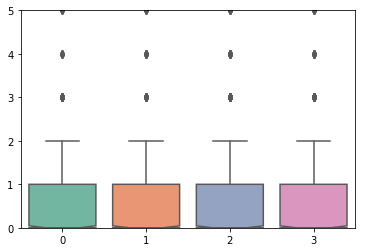

In [52]:
QBox = sns.boxplot(data = QArray1, orient = "v", palette = "Set2", notch = True)

plt.ylim(0, 5)

Here we can see that the quarters aren't statistically signifcantly different from one another in terms of number of hate crimes 

(0, 20)

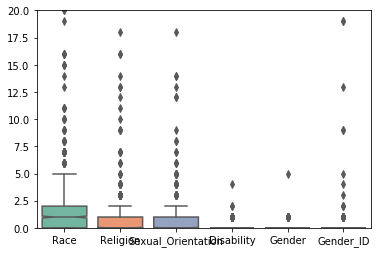

In [53]:
## Now, we're going to make boxplots comparing the different biases in hate crimes:

Motives = merge2.iloc[:, 4:10]

QBox = sns.boxplot(data = Motives, orient = "v", palette = "Set2", notch = True)

plt.ylim(0, 20)

This is again too small to see, so I'll adjust the Y axis again

(0, 5.5)

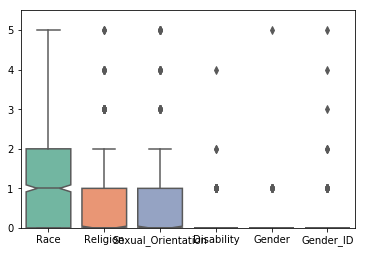

In [54]:
QBox = sns.boxplot(data = Motives, orient = "v", palette = "Set2", notch = True)

plt.ylim(0, 5.5)

Here, we can see that most hate crimes are committed based on race, which is expected, with Religion and Sexual Orientation following. The notches do not overlap between race and the other biases, indicating that the difference is statistically significant. Disability, Gender, and Gender Identity are less common biases